In [1]:
#kutuphanaleri import edelim
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import locale
os.chdir('C:/Users/TCHTOPCUOGLU/Desktop/my_git_in_process/in_process')

In [ ]:
#for checking languages
#
#for x in locale.windows_locale.values():
#    print(x.replace('_','-'))

In [2]:
#spss formatindaki veriyi okuyalim
import savReaderWriter
locale.setlocale(locale.LC_ALL, 'tr-TR')
lst=[]
with savReaderWriter.SavReader('toplamveri3.sav',ioUtf8=True,returnHeader=True) as reader:
    for line in reader:
        lst.append(line)

In [3]:
#data nın gorunumu
df=pd.DataFrame(lst,columns=lst[0])
df=df.drop(df.index[0])
df.head()

,ANKETNO,K1,K2,K3,K4,K5,K6,K7,K8,K9,...,K153,K154,K155,K156,K156A,K157,K158,K159,K160,K155a
1,OM1,16,1,1,1,1,58,14,3,None,...,6,2,2,1,,1300,3,24,None,2
2,OM2,16,1,1,1,3,63,1,2,None,...,6,1,3,1,,850,2,9,None,3
3,OM3,16,1,1,1,2,75,6,4,None,...,D,6,2,1,,None,4,1,None,2
4,OM4,16,1,1,1,None,4.66,14,2,None,...,4,3,2,1,,3000,3,12,None,2
5,OM5,16,1,1,1,3,4.88,22,3,None,...,6,3,2,1,,None,1,8,None,2


In [4]:
#Bosluk iceren hücreleri Nan olarak dolduralım
df = df.replace(r'^\s*$', np.nan, regex=True)

In [5]:
df.head(5)

,ANKETNO,K1,K2,K3,K4,K5,K6,K7,K8,K9,...,K153,K154,K155,K156,K156A,K157,K158,K159,K160,K155a
1,OM1,16.0,1.0,1.0,1.0,1.0,58.00,14.0,3.0,NaN,...,6,2.0,2.0,1.0,NaN,1300.0,3.0,24.0,None,2.0
2,OM2,16.0,1.0,1.0,1.0,3.0,63.00,1.0,2.0,NaN,...,6,1.0,3.0,1.0,NaN,850.0,2.0,9.0,None,3.0
3,OM3,16.0,1.0,1.0,1.0,2.0,75.00,6.0,4.0,NaN,...,D,6.0,2.0,1.0,NaN,NaN,4.0,1.0,None,2.0
4,OM4,16.0,1.0,1.0,1.0,NaN,4.66,14.0,2.0,NaN,...,4,3.0,2.0,1.0,NaN,3000.0,3.0,12.0,None,2.0
5,OM5,16.0,1.0,1.0,1.0,3.0,4.88,22.0,3.0,NaN,...,6,3.0,2.0,1.0,NaN,NaN,1.0,8.0,None,2.0


In [6]:
#check nulls
df.isnull().sum().sort_values(ascending=False).head(25)

K160     1794
K131F    1793
K135C    1792
K131E    1789
K133C    1788
K135B    1787
K133B    1786
K131D    1785
K135A    1785
K133A    1784
K131C    1779
K131B    1778
K131A    1776
K137C    1752
K65C     1737
K66C     1733
K83      1673
K137B    1667
K11      1623
K65B     1604
K66B     1601
K137A    1589
K106     1583
K156A    1510
K26b     1492
dtype: int64

In [7]:
#yuksek null degeri iceren kolonların atılması
for c in df:
    if sum(df[c].isnull()) >= 1600:
        df.drop(c, axis=1, inplace=True)

In [8]:
#null degerlerin dagilimlari
df.isnull().sum().sort_values().describe()

count     158.000000
mean      241.189873
std       447.042014
min         0.000000
25%        15.000000
50%        30.000000
75%        87.500000
max      1589.000000
dtype: float64

In [9]:
df.isnull().sum().sort_values(ascending=False).head(25)

K137A    1589
K106     1583
K156A    1510
K26a     1492
K26b     1492
K9       1454
K58      1424
K46      1340
K65A     1300
K16      1234
K10      1233
K15      1223
K66A     1217
K25      1206
K26      1182
K17      1171
K14      1098
K54a     1089
K54      1088
K13      1076
K23      1064
K24      1022
K18       929
K20       799
K52       696
dtype: int64

In [10]:
#kalan kolon sayısı
len(df.columns)

158

In [11]:
df.head(5)

,ANKETNO,K1,K2,K3,K4,K5,K6,K7,K8,K9,...,K152,K153,K154,K155,K156,K156A,K157,K158,K159,K155a
1,OM1,16.0,1.0,1.0,1.0,1.0,58.00,14.0,3.0,NaN,...,2.0,6,2.0,2.0,1.0,NaN,1300.0,3.0,24.0,2.0
2,OM2,16.0,1.0,1.0,1.0,3.0,63.00,1.0,2.0,NaN,...,2.0,6,1.0,3.0,1.0,NaN,850.0,2.0,9.0,3.0
3,OM3,16.0,1.0,1.0,1.0,2.0,75.00,6.0,4.0,NaN,...,4.0,D,6.0,2.0,1.0,NaN,NaN,4.0,1.0,2.0
4,OM4,16.0,1.0,1.0,1.0,NaN,4.66,14.0,2.0,NaN,...,5.0,4,3.0,2.0,1.0,NaN,3000.0,3.0,12.0,2.0
5,OM5,16.0,1.0,1.0,1.0,3.0,4.88,22.0,3.0,NaN,...,3.0,6,3.0,2.0,1.0,NaN,NaN,1.0,8.0,2.0


In [12]:
# basari puaninini 5 üstünden not değerlerine dönüştür.(5 skalasında olmayanlar için)
for i in range(1,len(df)):
    if df['K6'][i]>5:
        df['K6'][i]=(df['K6'][i]*5)/100

C:\Users\TCHTOPCUOGLU\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [13]:
df.head(5)

,ANKETNO,K1,K2,K3,K4,K5,K6,K7,K8,K9,...,K152,K153,K154,K155,K156,K156A,K157,K158,K159,K155a
1,OM1,16.0,1.0,1.0,1.0,1.0,2.90,14.0,3.0,NaN,...,2.0,6,2.0,2.0,1.0,NaN,1300.0,3.0,24.0,2.0
2,OM2,16.0,1.0,1.0,1.0,3.0,3.15,1.0,2.0,NaN,...,2.0,6,1.0,3.0,1.0,NaN,850.0,2.0,9.0,3.0
3,OM3,16.0,1.0,1.0,1.0,2.0,3.75,6.0,4.0,NaN,...,4.0,D,6.0,2.0,1.0,NaN,NaN,4.0,1.0,2.0
4,OM4,16.0,1.0,1.0,1.0,NaN,4.66,14.0,2.0,NaN,...,5.0,4,3.0,2.0,1.0,NaN,3000.0,3.0,12.0,2.0
5,OM5,16.0,1.0,1.0,1.0,3.0,4.88,22.0,3.0,NaN,...,3.0,6,3.0,2.0,1.0,NaN,NaN,1.0,8.0,2.0


Text(0.5,0,'UNIVERSITE')

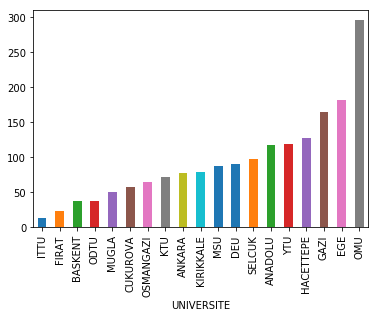

In [14]:
#universite basina yapilan anket sayilari
fig, ax = plt.subplots()
df.groupby('K1').count()['ANKETNO'].sort_values().rename(
    index={1:'ANADOLU',2:'ANKARA',3:'BASKENT',4:'CUKUROVA',5:'DEU',6:'EGE',7:'GAZI',8:'HACETTEPE',9:'ITTU',10:'KHU',
          11:'KTU',12:'AKU',13:'KIRIKKALE',14:'MSU',15:'MUGLA',16:'OMU',17:'ODTU',18:'OSMANGAZI',19:'SELCUK',
          20:'UFUK',21:'YTU',22:'YASAR',23:'FIRAT'}).plot(
    kind='bar')
ax.set_xlabel("UNIVERSITE")

Text(0.5,0,'SINIF')

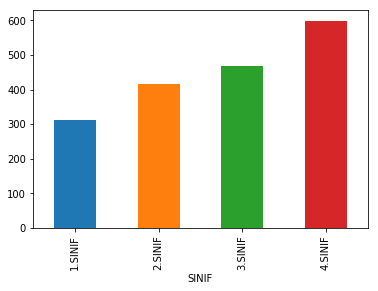

In [15]:
#ankete katılan ogrencilerin sınıflari
fig, ax = plt.subplots()
ax=df.groupby('K2').count()['ANKETNO'].sort_values().rename(index={1:'1.SINIF',2:'2.SINIF',3:'3.SINIF',4:'4.SINIF'}).plot(kind='bar')
ax.set_xlabel("SINIF")

Text(0.5,0,'Cinsiyet')

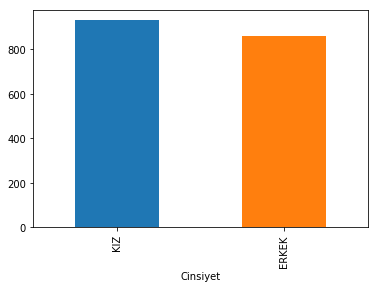

In [16]:
#ankete katilan ogrencilerin cinsiyetleri
fig, ax = plt.subplots()
ax=df.groupby('K3').count()['ANKETNO'].rename(index={1:'KIZ',2:'ERKEK'}).plot(kind='bar')
ax.set_xlabel("Cinsiyet")

Text(0.5,0,'OGRETIM TIPI')

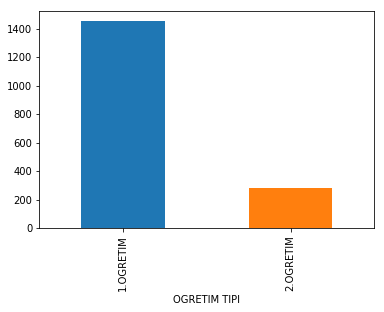

In [17]:
#anketer katilan ogrencilerin ogretim tipi
fig, ax = plt.subplots()
ax=df.groupby('K4').count()['ANKETNO'].rename(index={1:'1.OGRETIM',2:'2.OGRETIM'}).plot(kind='bar')
ax.set_xlabel("OGRETIM TIPI")

Text(0.5,0,'LISE')

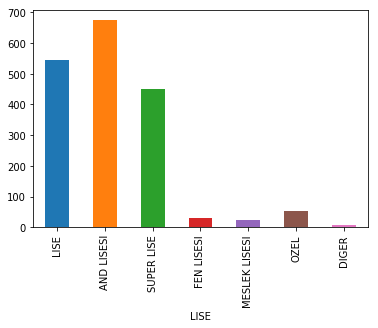

In [18]:
#lise bilgilerine bakalım
fig, ax = plt.subplots()
ax=df.groupby('K5').count()['ANKETNO'].rename(
    index={1:'LISE',2:'AND LISESI',3:'SUPER LISE',4:'FEN LISESI',5:'MESLEK LISESI',6:'OZEL',7:'DIGER'}).plot(kind='bar')
ax.set_xlabel("LISE")

In [19]:
df.groupby('K5').describe()[['K6','K7']].rename(
    index={1:'LISE',2:'AND LISESI',3:'SUPER LISE',4:'FEN LISESI',5:'MESLEK LISESI',6:'OZEL',7:'DIGER'}).rename(
    columns={'K6': 'NOT_ORT','K7':'TERCIH_SIRA'})

NOT_ORT                                                       \
                count      mean       std    min    25%    50%   75%   max   
K5                                                                           
LISE            504.0  3.668734  0.691744  1.150  3.250  3.700  4.15  5.00   
AND LISESI      646.0  3.951929  0.694564  0.337  3.600  3.900  4.50  5.00   
SUPER LISE      427.0  4.033270  0.685744  0.336  3.600  4.100  4.60  5.00   
FEN LISESI       29.0  3.425259  1.276251  0.300  3.200  3.800  4.19  5.00   
MESLEK LISESI    22.0  3.378636  1.048279  0.400  3.025  3.605  3.89  4.90   
OZEL             45.0  3.868000  0.949927  1.400  3.500  3.950  4.59  5.00   
DIGER             5.0  3.396000  0.399662  2.800  3.260  3.400  3.75  3.77   

              TERCIH_SIRA                                                 
                    count      mean       std  min  25%  50%   75%   max  
K5                                                                        
LISE                531.0  9.510358  5.719990  1.0  5.0  8.0  13.0  25.0  
AND LISESI          659.0  8.536692  5.337378  1.0  4.0  7.0  12.0  24.0  
SUPER LISE          444.0  8.891892  5.550265  1.0  4.0  8.0  12.0  24.0  
FEN LISESI           30.0  6.100000  5.188515  1.0  3.0  4.0   7.0  21.0  
MESLEK LISESI        22.0  6.681818  4.098622  1.0  4.0  6.0   7.0  17.0  
OZEL                 52.0  6.403846  4.683135  1.0  3.0  5.5   8.0  21.0  
DIGER                 7.0  7.571429  5.318432  4.0  4.0  7.0   7.5  19.0

In [20]:
df.head(2)

,ANKETNO,K1,K2,K3,K4,K5,K6,K7,K8,K9,...,K152,K153,K154,K155,K156,K156A,K157,K158,K159,K155a
1,OM1,16.0,1.0,1.0,1.0,1.0,2.90,14.0,3.0,NaN,...,2.0,6,2.0,2.0,1.0,NaN,1300.0,3.0,24.0,2.0
2,OM2,16.0,1.0,1.0,1.0,3.0,3.15,1.0,2.0,NaN,...,2.0,6,1.0,3.0,1.0,NaN,850.0,2.0,9.0,3.0


In [21]:
#en cok tercih eden 5 lise tipine gore bakalım
analysis_list=[]
for i in range(1,5):
     analysis_list.append(df[(df['K5'] == i)].groupby(['K1','K5']).mean()[['K6','K7']])

In [22]:
#3.90 ve üzeri not ortalamasına sahip öğrencilerin lise tipleri ve üniversite tercihleri
xx=pd.DataFrame()
for i in range(len(analysis_list)):
    xx=xx.append(analysis_list[i])

xx2=xx
#xx.index.names=['UNIVERSITE','LISE']
lise={1:'LISE',2:'AND LISESI',3:'SUPER LISE',4:'FEN LISESI',5:'MESLEK LISESI',6:'OZEL',7:'DIGER'}
universite={1:'ANADOLU',2:'ANKARA',3:'BASKENT',4:'CUKUROVA',5:'DEU',6:'EGE',7:'GAZI',8:'HACETTEPE',9:'ITTU',10:'KHU',
          11:'KTU',12:'AKU',13:'KIRIKKALE',14:'MSU',15:'MUGLA',16:'OMU',17:'ODTU',18:'OSMANGAZI',19:'SELCUK',
          20:'UFUK',21:'YTU',22:'YASAR',23:'FIRAT'}

def map_level(df, dct, level=0):
    index = df.index
    index.set_levels([[dct.get(item, item) for item in names] if i==level else names
                      for i, names in enumerate(index.levels)], inplace=True)

map_level(xx2, universite, level=0)    
map_level(xx2, lise, level=1)
xx2=xx2.reset_index()
xx2=xx2.rename(columns={'K1':'UNIVERSITE','K5':'LISE_TIPI','K6': 'NOT_ORT','K7':'TERCIH_SIRA'})
xx2=xx2[(xx2.NOT_ORT >=3.90)]
#xx2.sort_values(['NOT_ORT'],ascending=False)
xx2.groupby(['UNIVERSITE','LISE_TIPI']).agg({'NOT_ORT':'mean','TERCIH_SIRA':'mean'}).sort_values(['NOT_ORT'],ascending=False)

NOT_ORT  TERCIH_SIRA
UNIVERSITE LISE_TIPI                        
FIRAT      AND LISESI  4.750000     6.000000
ITTU       SUPER LISE  4.646667     2.800000
HACETTEPE  SUPER LISE  4.503600     7.160000
ANKARA     SUPER LISE  4.470000     7.812500
           FEN LISESI  4.400000     5.000000
YTU        FEN LISESI  4.383333     2.333333
ODTU       AND LISESI  4.323333     5.037037
ANKARA     AND LISESI  4.317879     7.781250
YTU        SUPER LISE  4.273077     7.650000
ITTU       AND LISESI  4.270000    10.000000
           LISE        4.270000     1.500000
EGE        SUPER LISE  4.256038     8.472727
HACETTEPE  AND LISESI  4.246835     6.000000
           LISE        4.226667     6.857143
YTU        AND LISESI  4.212642     7.886792
           LISE        4.142667     7.666667
ANKARA     LISE        4.106000     6.714286
GAZI       SUPER LISE  4.087333     7.782609
MSU        LISE        4.072000     8.000000
           SUPER LISE  4.065227     8.045455
EGE        AND LISESI  4.064449     7.514286
           LISE        4.021579     6.897436
KTU        LISE        3.993000     8.684211
MSU        AND LISESI  3.983816     8.358974
DEU        SUPER LISE  3.980556     9.111111
GAZI       AND LISESI  3.972667     7.540984
SELCUK     AND LISESI  3.964783    11.833333
DEU        LISE        3.959412     8.764706
BASKENT    SUPER LISE  3.956667     5.555556
KTU        AND LISESI  3.954583     9.291667

In [23]:
pd.crosstab(df.K29, df.K2, margins=True,dropna=False)

K2,1.0,2.0,3.0,4.0,All
K29,,,,,
1.0,7,7,9,16,39
2.0,22,31,40,60,153
3.0,69,83,84,117,353
4.0,165,220,230,285,900
5.0,37,51,55,60,203
All,311,415,469,599,1794


In [24]:
df_r1=df[['K2','K29']]
df_r2=df_r1[pd.isnull(df_r1).any(axis=1)]
df_r2.K29.isnull().groupby(df['K2']).sum().astype(int)

K2
1.0    11
2.0    23
3.0    51
4.0    61
Name: K29, dtype: int32

In [25]:
df_reduced=df[['K1','K2','K29','K31','K32','K33','K34','K35','K36','K37','K38','K39','K40','K41','K42','K43','K44','K45',
              'K67','K68','K69','K70','K71','K72','K73','K74','K75','K76','K77','K78','K79','K80','K81','K82','K84',
              'K109','K110']]

In [26]:
#verideki satir sayisi
len(df_reduced)

1794

In [27]:
#verideki kolon sayisi
len(df_reduced.columns)

37

In [28]:
#genel gorunum
df_reduced.head(5)

,K1,K2,K29,K31,K32,K33,K34,K35,K36,K37,...,K76,K77,K78,K79,K80,K81,K82,K84,K109,K110
1,16.0,1.0,3.0,2.0,3.0,2.0,2.0,2.0,2.0,2.0,...,3.0,3.0,4.0,3.0,2.0,3.0,3.0,5.0,6.0,6.0
2,16.0,1.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,...,4.0,4.0,5.0,3.0,4.0,3.0,4.0,5.0,5.0,5.0
3,16.0,1.0,4.0,1.0,3.0,1.0,1.0,2.0,2.0,2.0,...,1.0,2.0,2.0,1.0,2.0,2.0,2.0,3.0,5.0,5.0
4,16.0,1.0,4.0,1.0,4.0,2.0,3.0,4.0,4.0,2.0,...,1.0,1.0,1.0,3.0,1.0,1.0,3.0,2.0,9.0,9.0
5,16.0,1.0,4.0,3.0,5.0,4.0,3.0,2.0,2.0,4.0,...,1.0,1.0,1.0,2.0,1.0,1.0,2.0,5.0,6.0,7.0


In [29]:
#check nulls
df_reduced.isnull().sum().sort_values(ascending=False)

K29     146
K40      69
K31      62
K44      49
K35      48
K45      48
K41      47
K38      46
K37      40
K43      40
K34      32
K42      27
K39      23
K33      23
K32      23
K75      21
K36      20
K76      19
K77      18
K110     13
K109     13
K73      13
K79      13
K82      13
K70      12
K74      12
K78      12
K69      10
K80      10
K81      10
K71       8
K68       8
K84       5
K72       4
K67       3
K2        0
K1        0
dtype: int64

In [30]:
#universite,sinif gruplari bazında null degerler iceren kolonlarin ortalamasını bas
df_null=df_reduced.columns[df_reduced.isnull().any()].tolist()
#df_null
for i in df_null:
    #import ipdb;ipdb.set_trace();    
    df_reduced[i]= df_reduced.groupby(['K1','K2'])[i].apply(lambda x: x.fillna(x.mean()))

C:\Users\TCHTOPCUOGLU\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [31]:
df_reduced.isnull().sum().sort_values(ascending=False)

K110    0
K45     0
K43     0
K42     0
K41     0
K40     0
K39     0
K38     0
K37     0
K36     0
K35     0
K34     0
K33     0
K32     0
K31     0
K29     0
K2      0
K44     0
K67     0
K109    0
K68     0
K84     0
K82     0
K81     0
K80     0
K79     0
K78     0
K77     0
K76     0
K75     0
K74     0
K73     0
K72     0
K71     0
K70     0
K69     0
K1      0
dtype: int64

In [32]:
df_reduced=df_reduced.drop(columns=['K2'])
df_reduced.head(5)

,K1,K29,K31,K32,K33,K34,K35,K36,K37,K38,...,K76,K77,K78,K79,K80,K81,K82,K84,K109,K110
1,16.0,3.0,2.0,3.0,2.0,2.0,2.0,2.0,2.0,2.0,...,3.0,3.0,4.0,3.0,2.0,3.0,3.0,5.0,6.0,6.0
2,16.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,...,4.0,4.0,5.0,3.0,4.0,3.0,4.0,5.0,5.0,5.0
3,16.0,4.0,1.0,3.0,1.0,1.0,2.0,2.0,2.0,2.0,...,1.0,2.0,2.0,1.0,2.0,2.0,2.0,3.0,5.0,5.0
4,16.0,4.0,1.0,4.0,2.0,3.0,4.0,4.0,2.0,1.0,...,1.0,1.0,1.0,3.0,1.0,1.0,3.0,2.0,9.0,9.0
5,16.0,4.0,3.0,5.0,4.0,3.0,2.0,2.0,4.0,2.0,...,1.0,1.0,1.0,2.0,1.0,1.0,2.0,5.0,6.0,7.0


In [33]:
df_reduced.columns

Index(['K1', 'K29', 'K31', 'K32', 'K33', 'K34', 'K35', 'K36', 'K37', 'K38',
       'K39', 'K40', 'K41', 'K42', 'K43', 'K44', 'K45', 'K67', 'K68', 'K69',
       'K70', 'K71', 'K72', 'K73', 'K74', 'K75', 'K76', 'K77', 'K78', 'K79',
       'K80', 'K81', 'K82', 'K84', 'K109', 'K110'],
      dtype='object')

In [34]:
#her universitede yapilan anket sayisi farkli oldugu icin bayesci mantikla data icinden random olarak 
#esit sayida sample'lar aldım.DESIGN OF EXPERIMENT
#BURADAKI MAKSAT YUKSEK SAYIDA ANKETE KATILIM YAPAN UNIVERSITELERIN PUANLARININ YUKSEK CIKMASINI ENGELLEMEK VE DAHA ADIL BIR 
#DAGILIM ELDE ETMEK

smp={}
for i in range(0,7):
    smp[i] = df_reduced.sample(frac=0.1666666)

In [35]:
#gruplardaki sayi dagilimlari:
for key,value in smp.items():
    print(key, len(value)) 

0 299
1 299
2 299
3 299
4 299
5 299
6 299


In [36]:
#bir grubun gorunumu
smp[1].head()

,K1,K29,K31,K32,K33,K34,K35,K36,K37,K38,...,K76,K77,K78,K79,K80,K81,K82,K84,K109,K110
1715,8.0,4.0,3.777778,4.0,3.0,2.0,1.0,1.0,3.105263,2.210526,...,2.421053,3.315789,3.263158,3.736842,1.842105,2.0,3.0,4.0,6.0,8.0
1672,8.0,4.0,4.000000,4.0,4.0,5.0,3.0,5.0,4.000000,3.000000,...,4.000000,4.000000,2.000000,4.000000,2.000000,3.0,2.0,3.0,6.0,6.0
314,15.0,4.0,2.000000,3.0,4.0,2.0,2.0,3.0,4.000000,2.000000,...,2.000000,3.000000,2.000000,4.000000,2.000000,1.0,1.0,4.0,6.0,6.0
863,1.0,4.0,4.000000,5.0,5.0,5.0,5.0,5.0,5.000000,4.000000,...,2.000000,2.000000,4.000000,4.000000,2.000000,5.0,5.0,5.0,9.0,9.0
1280,11.0,4.0,3.000000,2.0,2.0,3.0,4.0,1.0,2.000000,2.000000,...,2.000000,4.000000,4.000000,4.000000,2.000000,4.0,2.0,2.0,8.0,7.0


In [37]:
#her bir soru kategorisine gore alt gruplar oluşturdum her bir sample icin
p1={}
p2={}
p3={}
for key,value in smp.items():
    p1[key]=smp[key].iloc[:,np.r_[0:2,2:17]]
    p2[key]=smp[key].iloc[:,np.r_[0,17:34]]
    p3[key]=smp[key].iloc[:,np.r_[0,34:36]]

In [38]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()  

p1_tr={}
for key,value in p1.items():
    p1_tr[key]= sc.fit_transform(p1[key].iloc[:,2:17])  

from sklearn.decomposition import PCA

p1_tr_pca={}
explained_variance_p1={}
for key,value in p1_tr.items():
    pca = PCA(n_components=3)  
    p1_tr_pca[key]=pca.fit_transform(p1_tr[key])
    explained_variance_p1[key] = pca.explained_variance_ratio_ 

explained_variance_p1


{0: array([0.46059453, 0.10157696, 0.07320567]),
 1: array([0.44779624, 0.11082218, 0.07383807]),
 2: array([0.42098332, 0.11071673, 0.08953752]),
 3: array([0.43780633, 0.09820392, 0.0759924 ]),
 4: array([0.4683196 , 0.09555286, 0.07861245]),
 5: array([0.48022661, 0.09391903, 0.07569213]),
 6: array([0.44777787, 0.10390066, 0.08452317])}

In [39]:
p1_comp={}
for key,value in p1.items():
     p1_comp[key]=pd.DataFrame(pca.components_,columns=p1[key].iloc[:,2:17].columns,index = ['PC-1','PC-2','PC-3'])

for key,value in p1_comp.items():
    print(key,value)

0            K31       K32       K33       K34       K35       K36       K37  \
PC-1  0.246216  0.260549  0.269307  0.293480  0.201636  0.267001  0.299345   
PC-2 -0.022627  0.140852  0.253263  0.202077  0.236903  0.344336  0.222463   
PC-3  0.268787 -0.276834 -0.381235  0.173560  0.028333  0.116832  0.147124   

           K38       K39       K40       K41       K42       K43       K44  \
PC-1  0.252447  0.232972  0.179795  0.259701  0.247360  0.287740  0.268290   
PC-2  0.127571  0.095479 -0.342602 -0.173135  0.070826 -0.366380 -0.412593   
PC-3  0.282009  0.371669  0.168131 -0.334987 -0.528911  0.030147 -0.023117   

           K45  
PC-1  0.278467  
PC-2 -0.410202  
PC-3  0.014645  
1            K31       K32       K33       K34       K35       K36       K37  \
PC-1  0.246216  0.260549  0.269307  0.293480  0.201636  0.267001  0.299345   
PC-2 -0.022627  0.140852  0.253263  0.202077  0.236903  0.344336  0.222463   
PC-3  0.268787 -0.276834 -0.381235  0.173560  0.028333  0.116832  0.

In [40]:
p1_bf_union={}
for key,value in p1_tr_pca.items():
    p1_bf_union[key]=pd.DataFrame(p1_tr_pca[key]).iloc[:,0]

In [41]:
p1_df=pd.DataFrame(p1_bf_union)
p1_df.head(5)

,0,1,2,3,4,5,6
0,-2.950503,-1.535477,-0.292111,-4.269908,0.955186,-0.306760,4.382867
1,2.706885,3.210393,-1.730155,0.644413,-0.478033,1.324787,-3.992706
2,0.923530,-1.324922,0.343720,-0.129300,-0.125337,-3.176422,3.983581
3,-0.078975,6.063196,2.178134,3.623008,-2.343773,0.208914,2.159247
4,2.714015,-0.780047,0.133276,2.061913,-4.293137,-0.389665,-4.446526


In [42]:
res_p1={}
from scipy.stats import ttest_ind
for i in range(len(p1_df.columns)):
    for m in range(1,len(p1_df.columns)):
        res_p1[i,m]=ttest_ind(p1_df.iloc[:,i], p1_df.iloc[:,m], equal_var=False)

for key,value in res_p1.items():
    #print(key,value[1])
    print(key,'Statistics=%.3f, p=%.3f' % (value[0], value[1]))
# interpret
    alpha = 0.05
    if value[1] > alpha:
        print('Same distributions (fail to reject H0)')
    else:
        print('Different distributions (reject H0)')

(0, 1) Statistics=0.000, p=1.000
Same distributions (fail to reject H0)
(0, 2) Statistics=-0.000, p=1.000
Same distributions (fail to reject H0)
(0, 3) Statistics=-0.000, p=1.000
Same distributions (fail to reject H0)
(0, 4) Statistics=-0.000, p=1.000
Same distributions (fail to reject H0)
(0, 5) Statistics=-0.000, p=1.000
Same distributions (fail to reject H0)
(0, 6) Statistics=0.000, p=1.000
Same distributions (fail to reject H0)
(1, 1) Statistics=0.000, p=1.000
Same distributions (fail to reject H0)
(1, 2) Statistics=-0.000, p=1.000
Same distributions (fail to reject H0)
(1, 3) Statistics=-0.000, p=1.000
Same distributions (fail to reject H0)
(1, 4) Statistics=-0.000, p=1.000
Same distributions (fail to reject H0)
(1, 5) Statistics=-0.000, p=1.000
Same distributions (fail to reject H0)
(1, 6) Statistics=0.000, p=1.000
Same distributions (fail to reject H0)
(2, 1) Statistics=0.000, p=1.000
Same distributions (fail to reject H0)
(2, 2) Statistics=0.000, p=1.000
Same distributions (fai

In [43]:
#varyansı en cok aciklayan componenti ekleyelim.
for key,value in p1.items():
    p1[key]['pca_1']=np.array(p1_bf_union[key])

C:\Users\TCHTOPCUOGLU\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [44]:
#pca
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()  

p2_tr={}
for key,value in p2.items():
    p2_tr[key]= sc.fit_transform(p2[key].iloc[:,1:19])  

from sklearn.decomposition import PCA

p2_tr_pca={}
explained_variance_p2={}

for key,value in p2_tr.items():
    pca = PCA(n_components=3)  
    p2_tr_pca[key]=pca.fit_transform(p2_tr[key])
    explained_variance_p2[key] = pca.explained_variance_ratio_ 

explained_variance_p2

{0: array([0.39343206, 0.07952134, 0.06567165]),
 1: array([0.36658064, 0.08022855, 0.07147635]),
 2: array([0.36701921, 0.08074665, 0.06516494]),
 3: array([0.31940532, 0.08806585, 0.07074056]),
 4: array([0.38178592, 0.08205439, 0.06791576]),
 5: array([0.39166369, 0.0789152 , 0.07095974]),
 6: array([0.36201233, 0.08120205, 0.06633379])}

In [45]:
p2_comp={}
for key,value in p2.items():
     p2_comp[key]=pd.DataFrame(pca.components_,columns=p2[key].iloc[:,1:19].columns,index = ['PC-1','PC-2','PC-3'])

for key,value in p2_comp.items():
    print(key,value)

0            K67       K68       K69       K70       K71       K72       K73  \
PC-1  0.265655  0.303560  0.309399  0.213565  0.181599  0.294993  0.248126   
PC-2  0.148215 -0.122379 -0.029140 -0.215922 -0.181137 -0.237520 -0.323206   
PC-3  0.014863 -0.042053  0.045690 -0.090623 -0.221997 -0.050730 -0.052394   

           K74       K75       K76       K77       K78       K79       K80  \
PC-1  0.228992  0.260941  0.293098  0.270010  0.286617  0.069839  0.220021   
PC-2 -0.222381  0.115076  0.084167 -0.078258  0.097360  0.033608  0.522400   
PC-3  0.041153  0.269113  0.048874  0.085487  0.042702 -0.745859  0.159925   

           K81       K82       K84  
PC-1  0.224408  0.221725  0.008917  
PC-2  0.421964  0.043864  0.427205  
PC-3  0.077913 -0.195584 -0.470392  
1            K67       K68       K69       K70       K71       K72       K73  \
PC-1  0.265655  0.303560  0.309399  0.213565  0.181599  0.294993  0.248126   
PC-2  0.148215 -0.122379 -0.029140 -0.215922 -0.181137 -0.237520 -

In [46]:
p2_bf_union={}
for key,value in p2_tr_pca.items():
    p2_bf_union[key]=pd.DataFrame(p2_tr_pca[key]).iloc[:,0]

In [47]:
p2_df=pd.DataFrame(p2_bf_union)
p2_df.head(5)

,0,1,2,3,4,5,6
0,-4.156020,0.135654,0.860998,-4.504080,0.512043,-0.681905,4.048336
1,1.689346,-1.155813,-2.405063,5.095017,0.189770,-1.733885,1.379940
2,1.013613,3.253779,0.684502,1.253704,0.282461,-0.924365,-0.106477
3,0.298956,-2.760097,1.563977,0.972850,-2.111684,-1.590166,-0.678676
4,1.158113,-0.968921,2.420897,1.964192,-4.515509,-3.244708,-3.164404


In [48]:
res_p2={}
from scipy.stats import ttest_ind
for i in range(len(p2_df.columns)):
    for m in range(1,len(p2_df.columns)):
        res_p2[i,m]=ttest_ind(p2_df.iloc[:,i], p2_df.iloc[:,m], equal_var=False)

for key,value in res_p2.items():
    #print(key,value[1])
    print(key,'Statistics=%.3f, p=%.3f' % (value[0], value[1]))
# interpret
    alpha = 0.05
    if value[1] > alpha:
        print('Same distributions (fail to reject H0)')
    else:
        print('Different distributions (reject H0)')

(0, 1) Statistics=-0.000, p=1.000
Same distributions (fail to reject H0)
(0, 2) Statistics=-0.000, p=1.000
Same distributions (fail to reject H0)
(0, 3) Statistics=-0.000, p=1.000
Same distributions (fail to reject H0)
(0, 4) Statistics=-0.000, p=1.000
Same distributions (fail to reject H0)
(0, 5) Statistics=-0.000, p=1.000
Same distributions (fail to reject H0)
(0, 6) Statistics=-0.000, p=1.000
Same distributions (fail to reject H0)
(1, 1) Statistics=0.000, p=1.000
Same distributions (fail to reject H0)
(1, 2) Statistics=0.000, p=1.000
Same distributions (fail to reject H0)
(1, 3) Statistics=0.000, p=1.000
Same distributions (fail to reject H0)
(1, 4) Statistics=0.000, p=1.000
Same distributions (fail to reject H0)
(1, 5) Statistics=0.000, p=1.000
Same distributions (fail to reject H0)
(1, 6) Statistics=0.000, p=1.000
Same distributions (fail to reject H0)
(2, 1) Statistics=-0.000, p=1.000
Same distributions (fail to reject H0)
(2, 2) Statistics=0.000, p=1.000
Same distributions (fail

In [49]:
#varyansı en çok acıklayan componentı ekleyelim.
for key,value in p2.items():
    p2[key]['pca_2']=np.array(p2_bf_union[key])

C:\Users\TCHTOPCUOGLU\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [50]:
#pca
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()  

p3_tr={}
for key,value in p3.items():
    p3_tr[key]= sc.fit_transform(p3[key].iloc[:,1:3])  

from sklearn.decomposition import PCA

p3_tr_pca={}
explained_variance_p3={}
for key,value in p3_tr.items():
    pca = PCA(n_components=2)  
    p3_tr_pca[key]=pca.fit_transform(p3_tr[key])
    explained_variance_p3[key] = pca.explained_variance_ratio_ 

explained_variance_p3

{0: array([0.7701703, 0.2298297]),
 1: array([0.7872913, 0.2127087]),
 2: array([0.81852362, 0.18147638]),
 3: array([0.73154981, 0.26845019]),
 4: array([0.81140018, 0.18859982]),
 5: array([0.78399111, 0.21600889]),
 6: array([0.81250048, 0.18749952])}

In [51]:
p3_comp={}
for key,value in p3.items():
     p3_comp[key]=pd.DataFrame(pca.components_,columns=p3[key].iloc[:,0:2].columns,index = ['PC-1','PC-2'])

for key,value in p3_comp.items():
    print(key,value)

0             K1      K109
PC-1 -0.707107 -0.707107
PC-2 -0.707107  0.707107
1             K1      K109
PC-1 -0.707107 -0.707107
PC-2 -0.707107  0.707107
2             K1      K109
PC-1 -0.707107 -0.707107
PC-2 -0.707107  0.707107
3             K1      K109
PC-1 -0.707107 -0.707107
PC-2 -0.707107  0.707107
4             K1      K109
PC-1 -0.707107 -0.707107
PC-2 -0.707107  0.707107
5             K1      K109
PC-1 -0.707107 -0.707107
PC-2 -0.707107  0.707107
6             K1      K109
PC-1 -0.707107 -0.707107
PC-2 -0.707107  0.707107


In [52]:
p3_bf_union={}
for key,value in p3_tr_pca.items():
    p3_bf_union[key]=pd.DataFrame(p3_tr_pca[key]).iloc[:,0]

In [53]:
p3_df=pd.DataFrame(p3_bf_union)
p3_df.head(5)

,0,1,2,3,4,5,6
0,3.193458,-0.642689,-0.395025,0.454218,1.406260,1.913823,-2.061434
1,-2.512674,-0.062282,0.842690,0.703566,1.315337,-0.946689,0.040524
2,-0.277581,-0.062282,2.136562,-0.588015,-0.804883,2.887803,0.975753
3,-1.180478,-1.892986,-1.013883,0.757055,-0.759421,1.934299,0.664010
4,-0.642714,-0.992548,-1.365430,-0.614760,-0.385093,0.649310,0.631913


In [54]:
res_p3={}
from scipy.stats import ttest_ind
for i in range(len(p3_df.columns)):
    for m in range(1,len(p3_df.columns)):
        res_p3[i,m]=ttest_ind(p3_df.iloc[:,i], p3_df.iloc[:,m], equal_var=False)

for key,value in res_p3.items():
    #print(key,value[1])
    print(key,'Statistics=%.3f, p=%.3f' % (value[0], value[1]))
# interpret
    alpha = 0.05
    if value[1] > alpha:
        print('Same distributions (fail to reject H0)')
    else:
        print('Different distributions (reject H0)')

(0, 1) Statistics=-0.000, p=1.000
Same distributions (fail to reject H0)
(0, 2) Statistics=-0.000, p=1.000
Same distributions (fail to reject H0)
(0, 3) Statistics=-0.000, p=1.000
Same distributions (fail to reject H0)
(0, 4) Statistics=0.000, p=1.000
Same distributions (fail to reject H0)
(0, 5) Statistics=-0.000, p=1.000
Same distributions (fail to reject H0)
(0, 6) Statistics=0.000, p=1.000
Same distributions (fail to reject H0)
(1, 1) Statistics=0.000, p=1.000
Same distributions (fail to reject H0)
(1, 2) Statistics=-0.000, p=1.000
Same distributions (fail to reject H0)
(1, 3) Statistics=0.000, p=1.000
Same distributions (fail to reject H0)
(1, 4) Statistics=0.000, p=1.000
Same distributions (fail to reject H0)
(1, 5) Statistics=-0.000, p=1.000
Same distributions (fail to reject H0)
(1, 6) Statistics=0.000, p=1.000
Same distributions (fail to reject H0)
(2, 1) Statistics=0.000, p=1.000
Same distributions (fail to reject H0)
(2, 2) Statistics=0.000, p=1.000
Same distributions (fail 

In [55]:
#varyansı en çok acıklayan componenti ekleyelim.
for key,value in p3.items():
    p3[key]['pca_3']=np.array(p3_bf_union[key])

C:\Users\TCHTOPCUOGLU\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [56]:
#soru tipine(bolumlerine) gore ayrıstırdığımız tabloları birlestirelim.
result={}
for key,value in p1.items():
    #result = p1[key].join(p2[key], on='K1',how='left')
    result[key]=pd.concat([p1[key], p2[key], p3[key]], axis=1, join='inner')
    

In [57]:
#dataframe haline getirelim.data artık bir butun halde olacak.
res=pd.DataFrame()
for i in range(0,6):
    res=res.append(result[i])

In [58]:
res.head(5)

,K1,K29,K31,K32,K33,K34,K35,K36,K37,K38,...,K79,K80,K81,K82,K84,pca_2,K1,K109,K110,pca_3
474,6.0,1.0,2.0,4.0,2.0,2.0,4.0,4.0,2.0,1.0,...,5.0,1.0,2.0,2.0,4.0,-4.156020,6.0,1.0,1.0,3.193458
537,7.0,1.0,4.0,5.0,5.0,2.0,4.0,4.0,4.0,3.0,...,3.0,4.0,4.0,4.0,4.0,1.689346,7.0,10.0,10.0,-2.512674
135,16.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,...,5.0,5.0,5.0,4.0,5.0,1.013613,16.0,6.0,7.0,-0.277581
492,6.0,4.0,3.0,3.0,3.0,4.0,4.0,4.0,4.0,3.0,...,3.0,2.0,4.0,4.0,3.0,0.298956,6.0,6.0,10.0,-1.180478
1341,18.0,4.0,2.0,4.0,3.0,4.0,4.0,3.0,5.0,3.0,...,4.0,2.0,2.0,4.0,4.0,1.158113,18.0,8.0,6.0,-0.642714


In [59]:
#finalde ilgilendiğimiz değişkenleri alalım
final_table=res[['K1','K29','pca_1','pca_2','pca_3']]

In [60]:
#veri temizliği
columnNumbers = [x for x in range(final_table.shape[1])]
columnNumbers.remove(0)
columnNumbers.remove(1)
final_table=final_table.iloc[:, columnNumbers]

In [61]:
#genel gorunum
final_table=pd.DataFrame(final_table)
final_table.head(5)

,K1,K29,pca_1,pca_2,pca_3
474,6.0,1.0,-2.950503,-4.156020,3.193458
537,7.0,1.0,2.706885,1.689346,-2.512674
135,16.0,3.0,0.923530,1.013613,-0.277581
492,6.0,4.0,-0.078975,0.298956,-1.180478
1341,18.0,4.0,2.714015,1.158113,-0.642714


In [62]:
#Ogrencilerin genel değerlendirme yaptıklaroo K29 sorusunu da scale edip diğer degiskenlerle aynı standarda getirelim.
final_table2=final_table
final_table2['K29_X'] = sc.fit_transform(np.array(final_table2['K29']).reshape(-1,1))
final_table2.head(5)

,K1,K29,pca_1,pca_2,pca_3,K29_X
474,6.0,1.0,-2.950503,-4.156020,3.193458,-3.021869
537,7.0,1.0,2.706885,1.689346,-2.512674,-3.021869
135,16.0,3.0,0.923530,1.013613,-0.277581,-0.729471
492,6.0,4.0,-0.078975,0.298956,-1.180478,0.416729
1341,18.0,4.0,2.714015,1.158113,-0.642714,0.416729


In [63]:
#her bir değişkeni 0-100 arasında sayıya transform edelim.
final_table2['pca_1_tr'] =(final_table2.pca_1-min(final_table2.pca_1))/(max(final_table2.pca_1)-min(final_table2.pca_1))*100
final_table2['pca_2_tr'] =(final_table2.pca_2-min(final_table2.pca_2))/(max(final_table2.pca_2)-min(final_table2.pca_2))*100
final_table2['pca_3_tr'] =(final_table2.pca_3-min(final_table2.pca_3))/(max(final_table2.pca_3)-min(final_table2.pca_3))*100
final_table2['pca_K29_X_tr'] =(final_table2.K29_X-min(final_table2.K29_X))/(max(final_table2.K29_X)-min(final_table2.K29_X))*100

In [64]:
final_table2.head(5)

,K1,K29,pca_1,pca_2,pca_3,K29_X,pca_1_tr,pca_2_tr,pca_3_tr,pca_K29_X_tr
474,6.0,1.0,-2.950503,-4.156020,3.193458,-3.021869,20.987494,19.269961,95.023178,0.0
537,7.0,1.0,2.706885,1.689346,-2.512674,-3.021869,64.496456,60.617224,2.588759,0.0
135,16.0,3.0,0.923530,1.013613,-0.277581,-0.729471,50.781303,55.837417,38.795340,50.0
492,6.0,4.0,-0.078975,0.298956,-1.180478,0.416729,43.071390,50.782286,24.169192,75.0
1341,18.0,4.0,2.714015,1.158113,-0.642714,0.416729,64.551290,56.859539,32.880506,75.0


In [65]:
#en son sonuca ulaşacağımız değişkenleri alalım
final_table3=final_table2[['K1','pca_1_tr','pca_2_tr','pca_3_tr','pca_K29_X_tr']]
final_table3=pd.DataFrame(final_table3)
final_table3.head(5)

,K1,pca_1_tr,pca_2_tr,pca_3_tr,pca_K29_X_tr
474,6.0,20.987494,19.269961,95.023178,0.0
537,7.0,64.496456,60.617224,2.588759,0.0
135,16.0,50.781303,55.837417,38.795340,50.0
492,6.0,43.071390,50.782286,24.169192,75.0
1341,18.0,64.551290,56.859539,32.880506,75.0


In [66]:
#her bir satırr bazında ortalama alıp ogrencinin elimizdeki 4 soru kategorisine verdiği cevapların ortalamasını bulalım.
final_table3['row_score']=final_table3.iloc[:,1:5].mean(axis=1)
final_table3.head(5)

,K1,pca_1_tr,pca_2_tr,pca_3_tr,pca_K29_X_tr,row_score
474,6.0,20.987494,19.269961,95.023178,0.0,33.820158
537,7.0,64.496456,60.617224,2.588759,0.0,31.925610
135,16.0,50.781303,55.837417,38.795340,50.0,48.853515
492,6.0,43.071390,50.782286,24.169192,75.0,48.255717
1341,18.0,64.551290,56.859539,32.880506,75.0,57.322834


In [67]:
#her bir öğrenci için bulduğumuz skorları üniversite bazında ortalamasını alarak final sonuca ulasalım
Results=final_table3.groupby(['K1']).mean()['row_score'].sort_values(ascending=False).rename(
    index={1:'ANADOLU',2:'ANKARA',3:'BASKENT',4:'CUKUROVA',5:'DEU',6:'EGE',7:'GAZI',8:'HACETTEPE',9:'ITTU',10:'KHU',
          11:'KTU',12:'AKU',13:'KIRIKKALE',14:'MSU',15:'MUGLA',16:'OMU',17:'ODTU',18:'OSMANGAZI',19:'SELCUK',
          20:'UFUK',21:'YTU',22:'YASAR',23:'FIRAT'})

In [68]:
#Sonuc:
Results=pd.DataFrame(Results).reset_index()
Results.columns = ['Universite', 'Deger_Skoru']
Results

,Universite,Deger_Skoru
0,DEU,56.647216
1,ANADOLU,56.229902
2,ODTU,55.024587
3,CUKUROVA,54.670874
4,SELCUK,54.514763
5,HACETTEPE,52.957101
6,BASKENT,52.645276
7,KTU,52.190166
8,OSMANGAZI,51.823698
9,FIRAT,51.590326
